In [2]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import multiprocessing
from multiprocessing import Pool
import os

(20, 20, 64, 128)


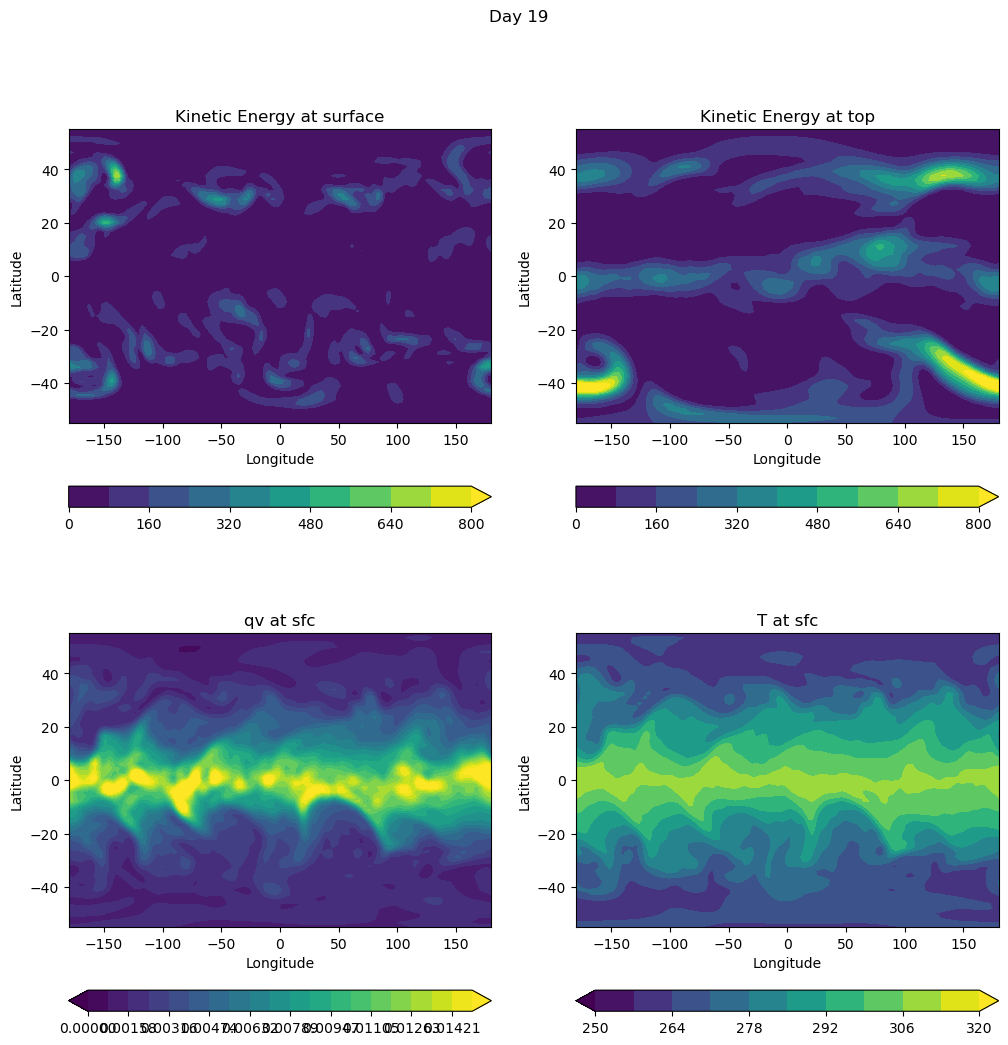

In [3]:
#read_file     = load("0404_300_50_8_variables.dat")
file  = "outputs/0523/test_only_advection_all.dat"
t     = 19
ds                = h5py.File(file, "r")

u                 = np.asarray(ds["grid_u_c_xyzt"])
v                 = np.asarray(ds["grid_v_c_xyzt"])
spe_vor_final_xyz = np.asarray(ds["spe_vor_c_xyzt"])
grid_t_c_xyzt     = np.asarray(ds["grid_t_c_xyzt"])
grid_t_eq_xyzt    = np.asarray(ds["grid_t_eq_xyzt"])
grid_p_full_xyzt  = np.asarray(ds["grid_p_full_xyzt"])
qv                = np.asarray(ds["grid_tracers_c_xyz1t"])
grid_t_c_xyzt     = np.asarray(ds["grid_t_c_xyzt"])


k = 0.5*(v**2+ u**2)
print(k.shape)
x = np.linspace(-180,180,128)
y = np.linspace(-55, 55,64)
xx, yy = np.meshgrid(x, y)

fig, ax = plt.subplots(2, 2, figsize=(12, 12))
fig.suptitle(f"Day {t}")
cs0 = ax[0, 0].contourf(xx, yy, k[t, 19], levels=np.linspace(0, 800, 11), extend='max')
fig.colorbar(cs0, orientation='horizontal')
    
ax[0, 0].set_title(f"Kinetic Energy at surface")

cs1 = ax[0, 1].contourf(xx, yy, k[t, 0], levels=np.linspace(0, 800, 11), extend='max')
fig.colorbar(cs1, orientation='horizontal')
ax[0, 1].set_title(f"Kinetic Energy at top")

cs2 = ax[1, 0].contourf(xx, yy, qv[t,19], levels=np.linspace(0, 0.015, 20), extend='both')
fig.colorbar(cs2, orientation='horizontal')
ax[1, 0].set_title(f"qv at sfc")

cs3 = ax[1, 1].contourf(xx, yy, grid_t_c_xyzt[t, 19], levels=np.linspace(250, 320, 11), extend='both')
fig.colorbar(cs3, orientation='horizontal')
ax[1, 1].set_title(f"T at sfc")

for i in range(2):
    for j in range(2):
        ax[i, j].set_xlabel("Longitude")
        ax[i, j].set_ylabel("Latitude")


In [18]:
to = 5
savepath = "graphs/test_only_advection_all"
file = "outputs/0523/test_only_advection_all.dat"


ds    = h5py.File(file, "r")

u      = np.asarray(ds["grid_u_c_xyzt"])
v      = np.asarray(ds["grid_v_c_xyzt"])
spe_vor_final_xyz = np.asarray(ds["spe_vor_c_xyzt"])
grid_t_c_xyzt = np.asarray(ds["grid_t_c_xyzt"])
grid_t_eq_xyzt = np.asarray(ds["grid_t_eq_xyzt"])
grid_p_full_xyzt   = np.asarray(ds["grid_p_full_xyzt"])
qv      = np.asarray(ds["grid_tracers_c_xyz1t"])
grid_t_c_xyzt = np.asarray(ds["grid_t_c_xyzt"])


k = 0.5*(v**2+ u**2)
print(k.shape)
x = np.linspace(-180,180,128)
y = np.linspace(-55, 55,64)
xx, yy = np.meshgrid(x, y)

try:
    os.makedirs(f"{savepath}")
except FileExistsError:
    pass

def plot_all(t):
    fig, ax = plt.subplots(2, 2, figsize=(12, 12))
    fig.suptitle(f"Day {t}")
    cs0 = ax[0, 0].contourf(xx, yy, k[t, 19], levels=np.linspace(0, 800, 11), extend='max')
    fig.colorbar(cs0, orientation='horizontal')
    
    ax[0, 0].set_title(f"Kinetic Energy at surface")

    cs1 = ax[0, 1].contourf(xx, yy, k[t, 0], levels=np.linspace(0, 800, 11), extend='max')
    fig.colorbar(cs1, orientation='horizontal')
    ax[0, 1].set_title(f"Kinetic Energy at top")

    cs2 = ax[1, 0].contourf(xx, yy, qv[t, 0])
    fig.colorbar(cs2, orientation='horizontal')
    ax[1, 0].set_title(f"qv at sfc")

    cs3 = ax[1, 1].contourf(xx, yy, grid_t_c_xyzt[t, 19], levels=np.linspace(250, 320, 11), extend='both')
    fig.colorbar(cs3, orientation='horizontal')
    ax[1, 1].set_title(f"T at sfc")

    for i in range(2):
        for j in range(2):
            ax[i, j].set_xlabel("Longitude")
            ax[i, j].set_ylabel("Latitude")

    plt.savefig(f"{savepath}/{t}.png", dpi=300.)
    plt.close()

(5, 20, 64, 128)


In [23]:
for i in range(5):
    plot_all(i)

In [3]:
leap = 1
nProc = int(multiprocessing.cpu_count() // 2)
with Pool(nProc) as p:
    results = [p.apply_async(plot_all, (t, )) for t in range(0, to, leap)]
    final = [result.get() for result in results]
!cd $savepath && ffmpeg -r 5 -i %d.png -pix_fmt yuv420p 0.mov -y

Process SpawnPoolWorker-1:
Traceback (most recent call last):
  File "/Users/Shared/miniconda3/envs/default_env/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/Shared/miniconda3/envs/default_env/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/Shared/miniconda3/envs/default_env/lib/python3.9/multiprocessing/pool.py", line 114, in worker
    task = get()
  File "/Users/Shared/miniconda3/envs/default_env/lib/python3.9/multiprocessing/queues.py", line 367, in get
    return _ForkingPickler.loads(res)
AttributeError: Can't get attribute 'plot_all' on <module '__main__' (built-in)>
Process SpawnPoolWorker-2:
Traceback (most recent call last):
  File "/Users/Shared/miniconda3/envs/default_env/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/Users/Shared/miniconda3/envs/default_env/lib/python3.9/multiprocessing/process.py", line 108

KeyboardInterrupt: 